In [1]:
import requests
from PIL import Image, ImageDraw, ImageFont
from io import BytesIO

In [8]:
subscription_key = '49cb8e512c604f43bd1a0ee1baffef0b'
face_api_url = 'https://labuser12face.cognitiveservices.azure.com/face/v1.0/detect/'

# Class, Library, Package 대문자 관례
# 지역변수, 파라메타 소문자 관례
# addr, msg 줄임말은 배제
# 두 단어가 합쳐지면 두 분째 단어는 대문자로 표기
# 상수는 전체가 대문자

In [7]:
image_url = 'https://images.saymedia-content.com/.image/t_share/MTc0NDU5ODkxMTU3OTAyNjk2/top-10-most-popular-k-pop-boy-groups.jpg'

In [9]:
image = Image.open(BytesIO(requests.get(image_url).content))

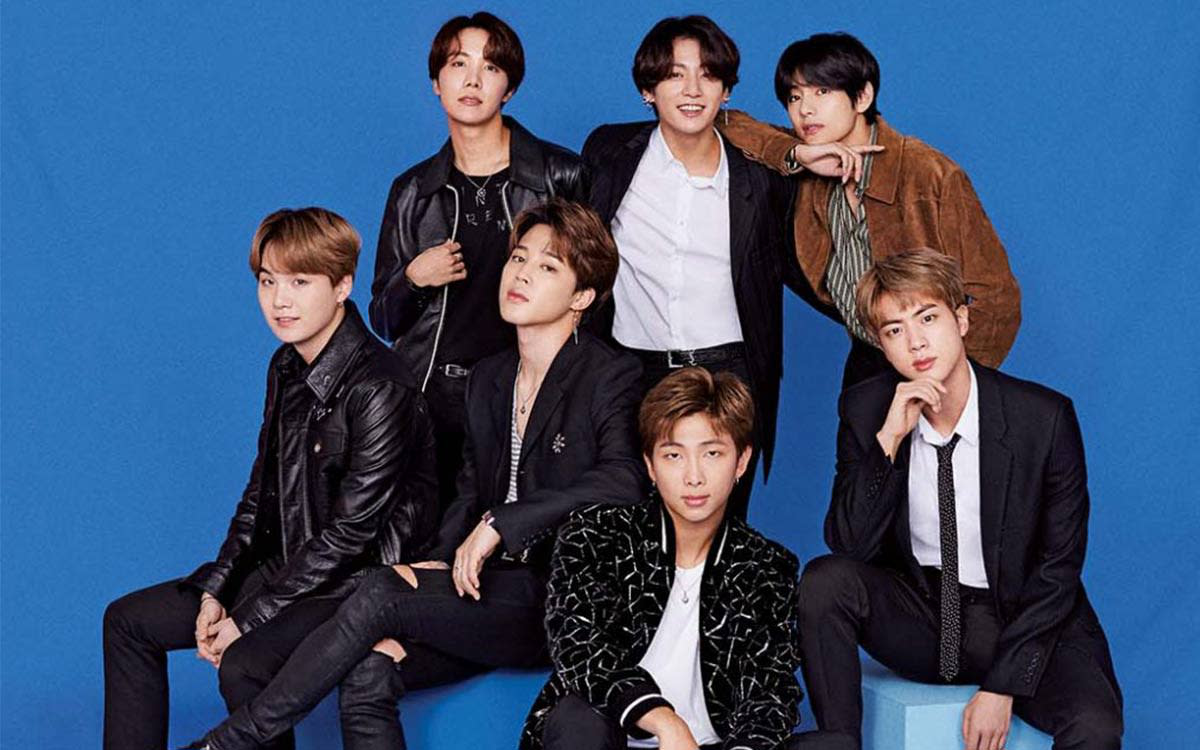

In [10]:
image

In [26]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key}
params  = {
    'returnFaceID' : 'false',
    'returnFaceLandmarks' : 'false',
    'returnFaceAttributes' : 'smile'
}
data = {'url': image_url}

In [27]:
response = requests.post(face_api_url, params = params, headers = headers, json = data)
faces = response.json()
faces

[{'faceRectangle': {'top': 432, 'left': 651, 'width': 86, 'height': 86},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 303, 'left': 877, 'width': 80, 'height': 80},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 51, 'left': 654, 'width': 76, 'height': 76},
  'faceAttributes': {'smile': 1.0}},
 {'faceRectangle': {'top': 262, 'left': 247, 'width': 75, 'height': 75},
  'faceAttributes': {'smile': 0.141}},
 {'faceRectangle': {'top': 241, 'left': 487, 'width': 75, 'height': 75},
  'faceAttributes': {'smile': 0.019}},
 {'faceRectangle': {'top': 45, 'left': 436, 'width': 73, 'height': 73},
  'faceAttributes': {'smile': 0.0}},
 {'faceRectangle': {'top': 75, 'left': 776, 'width': 68, 'height': 68},
  'faceAttributes': {'smile': 0.0}}]

In [28]:
draw = ImageDraw.Draw(image)

In [45]:
def DrawBox(faces):

  for face in faces:
    rect = face['faceRectangle']
    left = rect['left']
    top = rect['top']
    width = rect['width']
    height = rect['height']
    
    draw.rectangle(((left, top),(left + width, top + height)),outline = 'red')

    face_attributes = face['faceAttributes']
    smile = face_attributes['smile']

    draw.text((left, top), str(smile), fill='red')

In [46]:
DrawBox(faces)

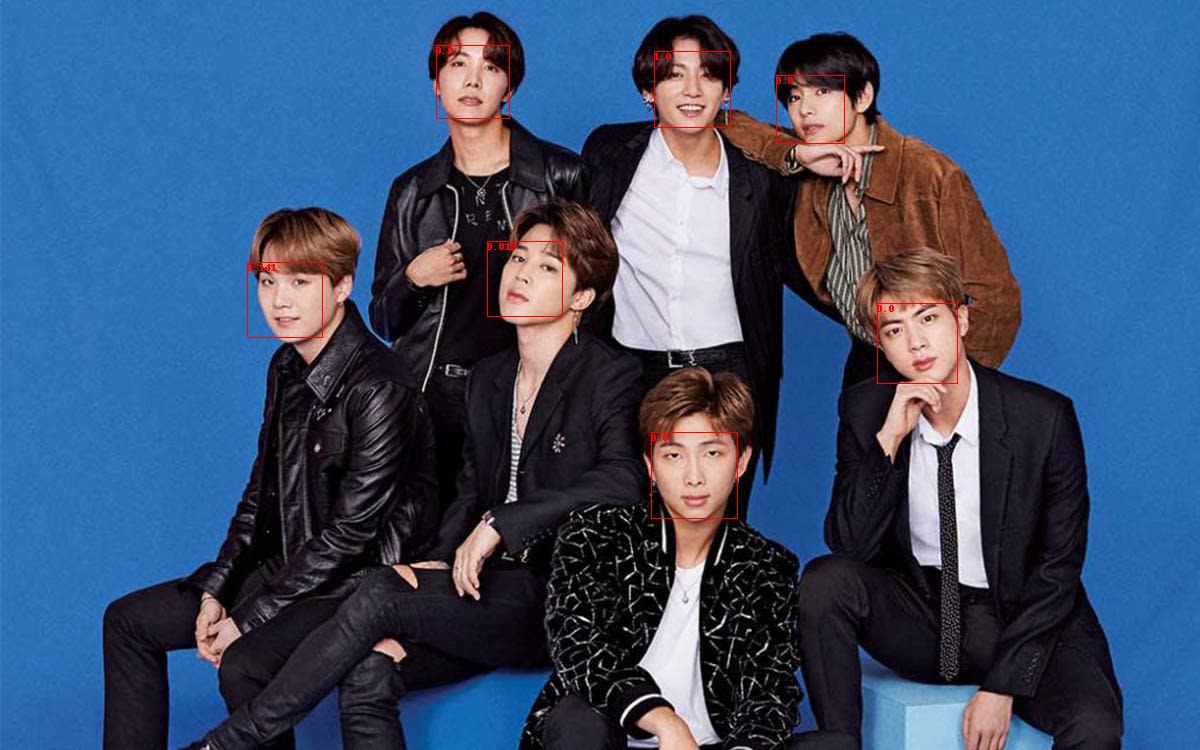

In [47]:
image

# 새 섹션